<a href="https://colab.research.google.com/github/gdimop10/CS230-final-project/blob/main/CS_230_project_v11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import torch
import tensorflow
import sys
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image

# Generating the Baseline of YOLO Model

In [2]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt 

     |████████████████████████████████| 596 kB 5.2 MB/s 


In [3]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12169, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 12169 (delta 0), reused 2 (delta 0), pack-reused 12167
Receiving objects: 100% (12169/12169), 11.93 MiB | 27.46 MiB/s, done.
Resolving deltas: 100% (8427/8427), done.


In [4]:
# Load YOLO Model
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-6-2 Python-3.7.13 torch-1.11.0+cu113 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# Downloading the SoccerNet dataset
Courtesy of the [creators](https://www.soccer-net.org/tasks/tracking) of the SoccerNet tracking dataset. For more details, visit the [SoccerNet tracking Github repository](https://github.com/SoccerNet/sn-tracking).


In [7]:
!pip install SoccerNet
from SoccerNet.Downloader import SoccerNetDownloader
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="path/to/SoccerNet")
mySoccerNetDownloader.downloadDataTask(task="tracking", split=["train","test","challenge"])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.0 MB/s 
     |████████████████████████████████| 2.3 MB 11.3 MB/s 


In [ ]:
!unzip path/to/SoccerNet/tracking/train.zip

In [ ]:
!unzip path/to/SoccerNet/tracking/test.zip

# Results of non-pretrained YOLO model

Weights and classes were derived from the [COCO test2017](https://https://cocodataset.org/#home) dataset by the [creators](https://github.com/ultralytics/yolov5) Of YOLOv5.

image 1/1: 1080x1920 19 persons
Speed: 36.8ms pre-process, 253.3ms inference, 1.8ms NMS per image at shape (1, 3, 384, 640)

---------------------
Coordinates of boundary boxes:
           xmin        ymin         xmax         ymax  confidence  class  \
0   1858.129761  930.750610  1919.591675  1069.289307    0.835924      0   
1    506.893433  661.794067   584.151489   769.745178    0.796624      0   
2   1081.554199  618.128418  1142.477783   724.761292    0.796329      0   
3   1554.815552  638.360229  1620.928345   767.238708    0.785257      0   
4    245.534363  622.107605   303.912903   722.588013    0.763325      0   
5   1401.597656  663.851624  1459.106689   773.248535    0.745402      0   
6   1453.740234  720.091553  1517.010986   865.355347    0.742145      0   
7   1244.483765  634.030579  1323.271362   787.604614    0.708212      0   
8    491.472565  575.101318   543.340454   679.038757    0.689134      0   
9    616.538635  553.554932   685.264465   661.212219    0.681

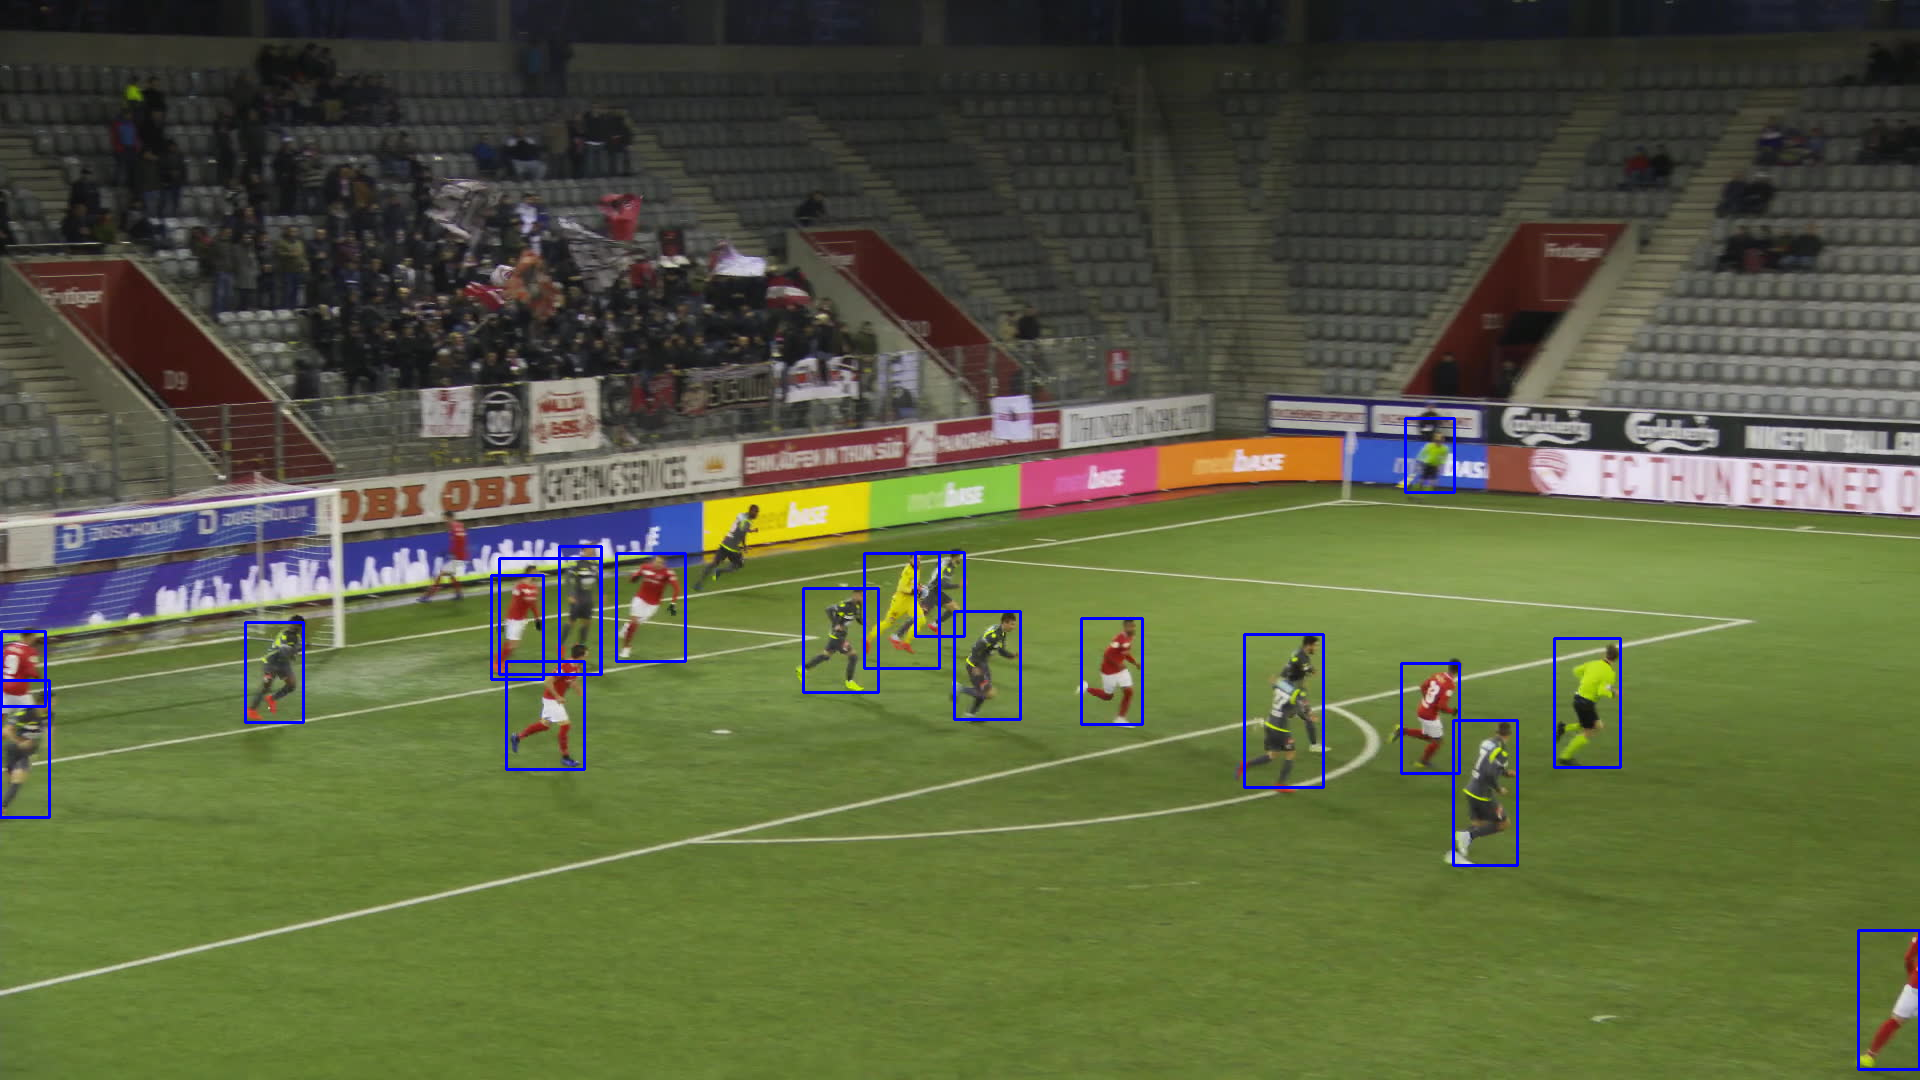

In [29]:
import cv2
from matplotlib.pyplot import imshow
from google.colab.patches import cv2_imshow
import numpy as np
# Test image from the SNMOT-100 training set.
img = Image.open('/content/train/SNMOT-100/img1/000252.jpg')
# Inputs the image into the pretrained YOLO model, and outputs its results.
yolo_model.eval()
results = yolo_model(img)
a = results.pandas().xyxy[0]
print(results)
print('---------------------')
print("Coordinates of boundary boxes:")
print(a)
# Draws boundary boxes around the detected objects.
base = cv2.imread('/content/train/SNMOT-100/img1/000252.jpg')
height = base.shape[0]
width = base.shape[1]
for x in range(len(a)):
  cv2.line(base, (int(a.iloc[x]['xmin']),int(a.iloc[x]['ymin'])), (int(a.iloc[x]['xmin']),int(a.iloc[x]['ymax'])), (255,0,0), 2)
  cv2.line(base, (int(a.iloc[x]['xmin']),int(a.iloc[x]['ymax'])), (int(a.iloc[x]['xmax']),int(a.iloc[x]['ymax'])), (255,0,0), 2)
  cv2.line(base, (int(a.iloc[x]['xmax']),int(a.iloc[x]['ymax'])), (int(a.iloc[x]['xmax']),int(a.iloc[x]['ymin'])), (255,0,0), 2)
  cv2.line(base, (int(a.iloc[x]['xmax']),int(a.iloc[x]['ymin'])), (int(a.iloc[x]['xmin']),int(a.iloc[x]['ymin'])), (255,0,0), 2)

cv2_imshow(base)

# Data pre-processing

In [10]:
import os
# creates a dataset folder to place the images, .txt files, and .yaml file into
newpath = '/content/dataset'
if not os.path.exists(newpath):
  os.makedirs(newpath)

newpath2 = '/content/dataset/images'
if not os.path.exists(newpath2):
  os.makedirs(newpath2)

newpath3 = '/content/dataset/images/train'
if not os.path.exists(newpath3):
  os.makedirs(newpath3)

newpath4 = '/content/dataset/images/test'
if not os.path.exists(newpath4):
  os.makedirs(newpath4)

newpath5 = '/content/dataset/labels/train'
if not os.path.exists(newpath5):
  os.makedirs(newpath5)

newpath6 = '/content/dataset/labels/test'
if not os.path.exists(newpath6):
  os.makedirs(newpath6)

In [ ]:
import os
os.chdir("/content/train")

In [12]:
# extracts the images and information from the train file and stores them into /content/dataset
import os, sys, random, shutil
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np

from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split


name_counter = 1
gtlist = []
snmotfiles = sorted(os.listdir())
# chooses one SNMOT file (750 images) for data preprocessing
for num in range(1):
  # in particular, we select SNMOT-100
  file = snmotfiles[21]
  if ('SNMOT' in file):
    # opens and reads gameinfo file
    gameinfo_path = '/content/train/' + file + '/gameinfo.ini' 
    with open(gameinfo_path) as gameinfo:
      gameinfolines = gameinfo.readlines()
    # opens and reads gt file
    gt_path = '/content/train/' + file + '/gt/gt.txt'
    with open(gt_path) as gt:
      gtlines = gt.readlines()
    # tokenizes each line in gt to create a list with the info needed for YOLO
    for line in gtlines:
      line = line.split(",")
      gtlist.append(line[:6])
    # converts the coordinates into the proper YOLO format
    for i in range(len(gtlist)):
      gtlist[i][0] = int(gtlist[i][0])
      # converts the trackletID into its specific class, which is readable by YOLO
      id_substring = "trackletID_" + str(gtlist[i][1])
      for giline in gameinfolines:
        if id_substring in giline:
          if "player team left" in giline:
            gtlist[i][1] = 0
          elif "player team right" in giline:
            gtlist[i][1] = 1
          elif "goalkeeper team left" in giline:
            gtlist[i][1] = 2
          elif "goalkeeper team right" in giline:
            gtlist[i][1] = 3
          elif "referee;main" in giline:
            gtlist[i][1] = 4
          elif "referee;side top" in giline:
            gtlist[i][1] = 5
          elif "referee;side bottom" in giline:
            gtlist[i][1] = 5
          elif "staff" in giline:
            gtlist[i][1] = 6
          elif "ball" in giline:
            gtlist[i][1] = 7
      gtlist[i][2] = (float(gtlist[i][2]) + (float(gtlist[i][4]) / 2)) / 1920
      gtlist[i][3] = (float(gtlist[i][3]) + (float(gtlist[i][5]) / 2)) / 1080
      gtlist[i][4] = float(gtlist[i][4]) / 1920
      gtlist[i][5] = float(gtlist[i][5]) / 1080
    # accesses the img file in SNMOT-100 and generates its filepath
    for file2 in os.listdir(file):
      if (file2 == 'img1'):
        source = os.getcwd() + '/' + file + '/' + file2 + '/'
        images = sorted(os.listdir(source))
      # renames each image file to prevent duplicates and stores them in a list
        for i in range(len(images)):
          old_img_name = images[i]
          new_img_name = str(name_counter) + old_img_name
          os.rename(source + old_img_name, source + new_img_name)
          images[i] = new_img_name
        # combines both lists into one final list for each photo
        for i in range(len(images)):
          # sets up name of new .txt file with path of /content/train/SNMOT-100/img1/*image*.txt
          txt_name = "/content/train/" + file + "/img1/" + images[i]
          txt_name = txt_name.replace("jpg", "txt")
          # creates a list of all objects within a photo
          total_image_list = []
          for j in range(len(gtlist)):
            image_list = []
            if (gtlist[j][0] == (i + 1)):
              image_list.append(gtlist[j][1])
              image_list.append(gtlist[j][2])
              image_list.append(gtlist[j][3])
              image_list.append(gtlist[j][4])
              image_list.append(gtlist[j][5])
              total_image_list.append(image_list)
          # creates .txt files which correspond to the .jpg images in img1
          corrected_image_list = []
          for item in total_image_list:
            corrected_image_list.append(item)
          first_item_list = corrected_image_list[:1]
          other_item_list = corrected_image_list[1:]
          with open(txt_name, 'w') as txt_file:
            first_line = ' '.join([str(first_item) for first_item in first_item_list[0]])
            txt_file.write(f"{first_line}")
            for m in range(len(other_item_list)):
              txt_file.write('\n')
              next_line = txt_line = ' '.join([str(other_item) for other_item in other_item_list[m]])
              txt_file.write(f"{next_line}")
    # creates train.txt file containing 90% of the .jpg images in img1
    ninety_percent = int(len(images) * .9)
    train_set = images[:ninety_percent]
    first_train_set = train_set[:1]
    other_train_set = train_set[1:]
    train_txt_name = "/content/train/" + file + "/img1/train.txt"
    with open(train_txt_name, 'w') as train_txt_file:
      first_train_line = str(first_train_set[0])
      train_txt_file.write(first_train_line)
      for n in range(len(other_train_set)):
        train_txt_file.write('\n')
        next_train_line = str(other_train_set[n])
        train_txt_file.write(next_train_line)
    # creates test.txt files containing 10% of the .jpg images in img1
    test_set = images[ninety_percent:]
    first_test_set = test_set[:1]
    other_test_set = test_set[1:]
    test_txt_name = "/content/train/" + file + "/img1/test.txt"
    with open(test_txt_name, 'w') as test_txt_file:
      first_test_line = str(first_test_set[0])
      test_txt_file.write(first_test_line)
      for n in range(len(other_test_set)):
        test_txt_file.write('\n')
        next_test_line = str(other_test_set[n])
        test_txt_file.write(next_test_line)

    # creates a copy of each .jpg and .txt file and places them into the proper dataset folder
    big_source = '/content/train/' + file + '/img1/'
    big_list = sorted(os.listdir(big_source))
    for i in range(len(big_list)):
      name = str(big_list[i])
      if i < (ninety_percent * 2):
        if ('test' not in name) and ('train' not in name):
          if ('.jpg' in name):
            shutil.copy2(big_source + name, '/content/dataset/images/train')
          if ('.txt' in name):
            shutil.copy2(big_source + name, '/content/dataset/labels/train')
      else:
        if ('test' not in name) and ('train' not in name):
          if ('.jpg' in name):
            shutil.copy2(big_source + name, '/content/dataset/images/test')
          if ('.txt' in name):
            shutil.copy2(big_source + name, '/content/dataset/labels/test')
        



# Training the new YOLO model

In [13]:
# creates the .yaml file consisting of the necessary classes
import json
import yaml
data = {
    'train': '/content/dataset/images/train/',
    'val' : '/content/dataset/images/test/',
    'nc' : 8,
    'names': ['player team left', 'player team right', 'goalkeeper team left', 'goalkeeper team right', 'main referee', 'side referee', 'staff', 'ball']
}
with open('/content/dataset/soccernet.yaml', 'w') as outfile:
  yaml.dump(data, outfile)

In [ ]:
!pip install wandb

In [2]:
# trains the YOLO model using transfer learning
import wandb
import tensorflow as tf
wandb.init(project = "CS230_v7", entity = "gdimop")

!python /content/yolov5/train.py \
  --data /content/dataset/soccernet.yaml \
  --epochs 10 \
  --bbox_interval 1 \
  --batch 16 \
  --weights yolov5s.pt

wandb: Currently logged in as: gdimop. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=/content/dataset/soccernet.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-242-ga80dd66 Python-3.7.13 torch-1.11.0+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, o

In [3]:
# exports the trained model to a local file
!zip -r /content/trained_file.zip /content/yolov5/runs/train/exp4

  adding: content/yolov5/runs/train/exp4/ (stored 0%)
  adding: content/yolov5/runs/train/exp4/val_batch0_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp4/P_curve.png (deflated 9%)
  adding: content/yolov5/runs/train/exp4/train_batch0.jpg (deflated 4%)
  adding: content/yolov5/runs/train/exp4/labels.jpg (deflated 19%)
  adding: content/yolov5/runs/train/exp4/PR_curve.png (deflated 13%)
  adding: content/yolov5/runs/train/exp4/weights/ (stored 0%)
  adding: content/yolov5/runs/train/exp4/weights/last.pt (deflated 9%)
  adding: content/yolov5/runs/train/exp4/weights/best.pt (deflated 9%)
  adding: content/yolov5/runs/train/exp4/results.png (deflated 8%)
  adding: content/yolov5/runs/train/exp4/val_batch1_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp4/val_batch1_labels.jpg (deflated 6%)
  adding: content/yolov5/runs/train/exp4/opt.yaml (deflated 43%)
  adding: content/yolov5/runs/train/exp4/train_batch1.jpg (deflated 5%)
  adding: content/yolov5/runs/train/

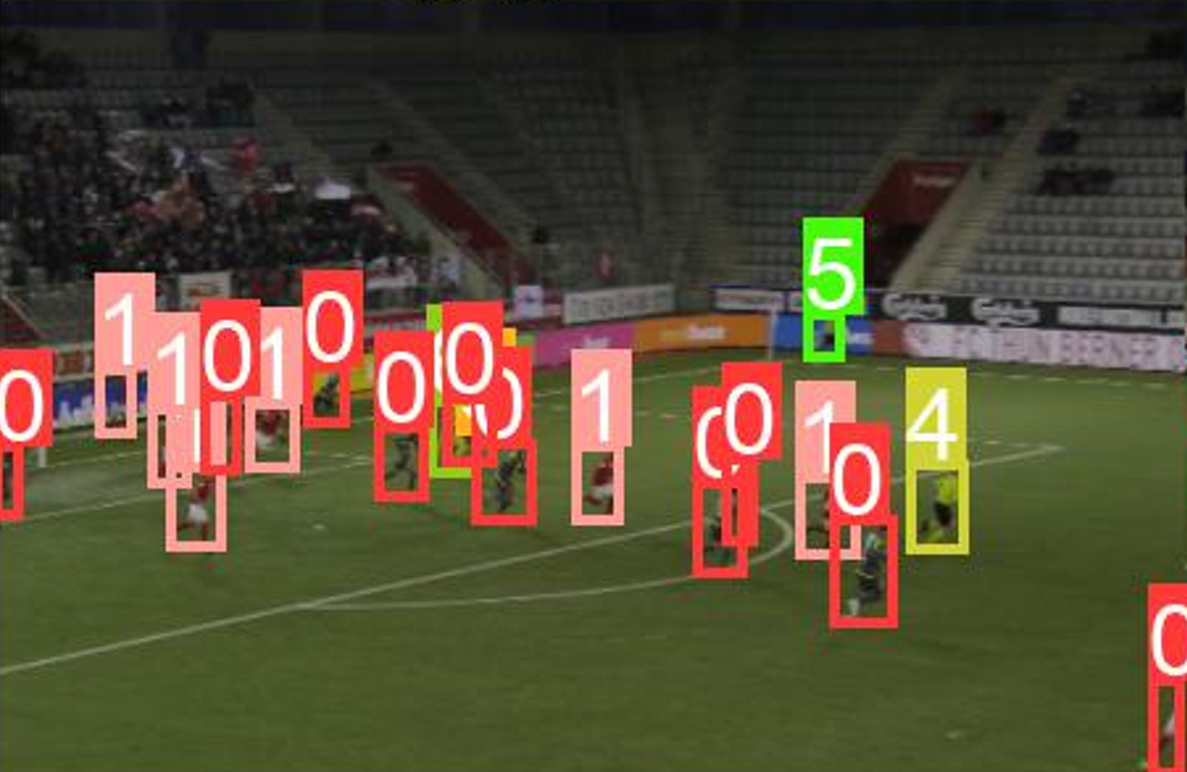

In [35]:
# a snapshot of the trained model's take on the photo given to the original model
import numpy as np
import cv2

# photo saved locally
img = cv2.imread('/content/SNMOT-100_000252.png')

cv2_imshow(img)

# Testing the newly-trained model

In [14]:
# tests the model on the test set
import wandb
import tensorflow as tf
wandb.init(project = "CS230_v7", entity = "gdimop")

!python /content/yolov5/val.py \
  --data /content/dataset/soccernet.yaml \
  --batch 16 \
  --weights /content/yolov5/runs/train/exp4/weights/best.pt

val: data=/content/dataset/soccernet.yaml, weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-242-ga80dd66 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7031701 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning '/content/dataset/labels/test.cache' images and labels... 75 found, 0 missing, 0 empty, 0 corrupt: 100% 75/75 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 5/5 [00:27<00:00,  5.43s/it]
                 all         75        827      0.928      0.415      0.439      0.241
    player team left         75        375      0.956       0.76       0.92      0.556
   player team right     

In [15]:
# exports the data from the test to a local file
!zip -r /content/tested_file.zip /content/yolov5/runs/val/exp

  adding: content/yolov5/runs/val/exp/ (stored 0%)
  adding: content/yolov5/runs/val/exp/val_batch0_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/val/exp/P_curve.png (deflated 9%)
  adding: content/yolov5/runs/val/exp/PR_curve.png (deflated 13%)
  adding: content/yolov5/runs/val/exp/val_batch1_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/val/exp/val_batch1_labels.jpg (deflated 6%)
  adding: content/yolov5/runs/val/exp/val_batch2_labels.jpg (deflated 6%)
  adding: content/yolov5/runs/val/exp/confusion_matrix.png (deflated 21%)
  adding: content/yolov5/runs/val/exp/R_curve.png (deflated 10%)
  adding: content/yolov5/runs/val/exp/val_batch0_labels.jpg (deflated 6%)
  adding: content/yolov5/runs/val/exp/val_batch2_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/val/exp/F1_curve.png (deflated 10%)
